The goal of this notebook is to show that <b>RGB colors</b> can be represented by a <a href = 'https://en.wikipedia.org/wiki/Vector_space'>vector space</a>:
* color_1 = color_2 = color_3 for any colors
* a * color_1 = color_2 for any number a and any color  
Operations of addition and multiplication have all the properties that we expect of them (such as existence of zero element).

There is only one cheat here: we clipped every initial RGB representation into [0.001, 0.999] interval, to make computation stable. But theoretically, the open interval (0,1) would do!


In [4]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter
from  matplotlib.patches import Rectangle
class ColorVector:
    def __init__(self, r = 0.5, g = 0.5, b = 0.5):
        if type(r) is str:
            c = ColorConverter()
            r, g, b = c.to_rgb(r)
        self.set_color([r, g, b])
    def __str__(self):
        return 'Color with R={}, G={}, B={}'.format(self.r, self.g, self.b)
    def logit(self, x):
        return np.log(x)-np.log(1-x)
    def invlogit(self, y):
        return 1/(1+np.exp(-y))
    def get_vector(self):
        return np.array([self.logit(self.r), self.logit(self.g), self.logit(self.b)])
    def set_vector(self, v):
        self.r = self.invlogit(v[0])
        self.g = self.invlogit(v[1])
        self.b = self.invlogit(v[2])
    def get_color(self):
        return [self.r, self.g, self.b]
    def set_color(self, color):
        self.r = min(0.999, max(color[0], 0.001))
        self.g = min(0.999, max(color[1], 0.001))
        self.b = min(0.999, max(color[2], 0.001))
    def copy(self):
        return ColorVector(self.r, self.g, self.b)
    def __add__(self, other):
        v = ColorVector()
        v.set_vector(self.get_vector() + other.get_vector())
        return v
    def __sub__(self, other):
        v = ColorVector()
        v.set_vector(self.get_vector() - other.get_vector())
        return v
    def __neg__(self):
        v = ColorVector()
        v.set_vector(-self.get_vector())
        return v
    def __mul__(self, n):
        v = ColorVector()
        v.set_vector(self.get_vector()*n)
        return v
    def show(self):
        plt.figure(figsize = (0.5,0.5))
        plt.axis('off')
        currentAxis = plt.gca()
        currentAxis.add_patch(Rectangle((0, 0), 1, 1, facecolor=self.get_color(), lw =0))

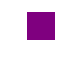

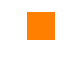

In [10]:
red = ColorVector('red')
blue = ColorVector('blue')

(red+blue).show()
(red-blue).show()

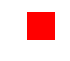

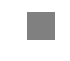

In [11]:
(red*2).show()
(red*0.0).show()

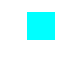

In [12]:
z=-red
(-red).show()

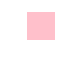

In [13]:
x = ColorVector('pink')
x.show()

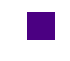

In [14]:
y=ColorVector('indigo')
y.show()

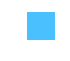

In [15]:
(y+x+z).show()